In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('FAO.csv', encoding = "ISO-8859-1")
data.head(2)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422


# Top 4 producers of staple foods across 5 decades

In [3]:
#Labeling staple foods
def staple_category(item):
    staple = ['maize','barley', 'oats','rice','wheat','potatoes','cassava', 'soybeans','sweet potatoes', 'yams', 'sorghum', 'plaintain']
    item = item.lower()
    title = item.split()
    for word in title:
        if word in staple:
            return word
        else:
            return 'N/A'

data['Staple Category'] = data['Item'].apply(staple_category)

In [ ]:
#Steps involved:
#a. collect food data for each decade [data which is staple + food]
#b. sum up the data for each country
#c. compute mean of data for each country for each decade
#d. select top 4 producers and plot their mean production

In [4]:
data_1960s = data[['Area Abbreviation','Item','Element','Staple Category','Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970']]
data_1970s = data[['Area Abbreviation','Item','Element','Staple Category','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980']]
data_1980s = data[['Area Abbreviation','Item','Element','Staple Category','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990']]
data_1990s = data[['Area Abbreviation','Item','Element','Staple Category','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000']]
data_2000s = data[['Area Abbreviation', 'Item','Element','Staple Category','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010']]

staple_food_1960s = data_1960s[(data_1960s['Element'] == 'Food') & (data_1960s['Staple Category'] != 'N/A')]
staple_food_1970s = data_1970s[(data_1970s['Element'] == 'Food') & (data_1970s['Staple Category'] != 'N/A')]
staple_food_1980s = data_1980s[(data_1980s['Element'] == 'Food') & (data_1980s['Staple Category'] != 'N/A')]
staple_food_1990s = data_1990s[(data_1990s['Element'] == 'Food') & (data_1990s['Staple Category'] != 'N/A')]
staple_food_2000s = data_2000s[(data_1960s['Element'] == 'Food') & (data_2000s['Staple Category'] != 'N/A')]
#2000
plot_staple_2000s = staple_food_2000s.groupby('Area Abbreviation').sum()
plot_staple_2000s.reset_index(inplace = True)
#Add a column for mean food production by each country in the entire decade
cols_2000 = plot_staple_2000s.loc[:,['Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010']]
plot_staple_2000s['average food production'] = cols_2000.mean(axis = 1)
#Obtaining the top 5 staple food producers (sorted by their average food production in the entire decade)
top_5_food_2000s = plot_staple_2000s.sort_values('average food production', ascending = False)[:5]


#1990
plot_staple_1990s = staple_food_1990s.groupby('Area Abbreviation').sum()
plot_staple_1990s.reset_index(inplace = True)

cols_1990 = plot_staple_1990s.loc[:,['Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000']]
plot_staple_1990s['average food production'] = cols_1990.mean(axis = 1)

top_5_food_1990s = plot_staple_1990s.sort_values('average food production', ascending = False)[:5]

#1980
plot_staple_1980s = staple_food_1980s.groupby('Area Abbreviation').sum()
plot_staple_1980s.reset_index(inplace = True)

cols_1980 = plot_staple_1980s.loc[:,['Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990']]
plot_staple_1980s['average food production'] = cols_1980.mean(axis = 1)

top_5_food_1980s = plot_staple_1980s.sort_values('average food production', ascending = False)[:5]


#1970
plot_staple_1970s = staple_food_1970s.groupby('Area Abbreviation').sum()
plot_staple_1970s.reset_index(inplace = True)

cols_1970 = plot_staple_1970s.loc[:,['Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980']]
plot_staple_1970s['average food production'] = cols_1970.mean(axis = 1)

top_5_food_1970s = plot_staple_1970s.sort_values('average food production', ascending = False)[:5]


#1960
plot_staple_1960s = staple_food_1960s.groupby('Area Abbreviation').sum()
plot_staple_1960s.reset_index(inplace = True)

cols_1960 = plot_staple_1960s.loc[:,['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970']]
plot_staple_1960s['average food production'] = cols_1960.mean(axis = 1)

top_5_food_1960s = plot_staple_1960s.sort_values('average food production', ascending = False)[:5]

In [5]:
#Creating a dataframe containing information about top 4 producers of food across all 5 decades (to summarize)
top_food_producers = pd.DataFrame({'China':[top_5_food_1960s['average food production'].iloc[0], top_5_food_1970s['average food production'].iloc[0], top_5_food_1980s['average food production'].iloc[0], top_5_food_1990s['average food production'].iloc[0], top_5_food_2000s['average food production'].iloc[0]],
                                   'India':[top_5_food_1960s['average food production'].iloc[1], top_5_food_1970s['average food production'].iloc[1], top_5_food_1980s['average food production'].iloc[1], top_5_food_1990s['average food production'].iloc[1], top_5_food_2000s['average food production'].iloc[1]],
                        'USA': [top_5_food_1960s['average food production'].iloc[2], top_5_food_1970s['average food production'].iloc[2], top_5_food_1980s['average food production'].iloc[3], top_5_food_1990s['average food production'].iloc[2], top_5_food_2000s['average food production'].iloc[2]],
                        'IDN': [top_5_food_1960s['average food production'].iloc[3], top_5_food_1970s['average food production'].iloc[3], top_5_food_1980s['average food production'].iloc[2], top_5_food_1990s['average food production'].iloc[3], top_5_food_2000s['average food production'].iloc[3]]}, 
                                  index = ['1960','1970','1980','1990','2000'], columns = ['China', 'India', 'USA', 'IDN'])

In [6]:
top_food_producers

,China,India,USA,IDN
1960,88392.5,70457.4,26981.3,20763.0
1970,135052.5,93163.6,30159.0,27994.9
1980,194019.7,127338.6,36828.6,37734.7
1990,232021.4,165276.5,47919.7,44418.2
2000,255729.7,190606.7,50701.1,50545.7


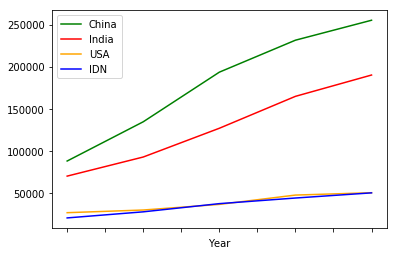

In [7]:
#Plotting information about top 4 staple food producers
top_staple_food_producers_plot = top_food_producers.reset_index()
top_staple_food_producers_plot['index'].astype('int64')
top_staple_food_producers_plot.rename(columns = {'index': 'Year'}, inplace = True)

ax = plt.gca()

top_staple_food_producers_plot.plot(kind='line',x='Year',y='China', color = 'green',ax=ax)
top_staple_food_producers_plot.plot(kind='line',x='Year',y='India', color='red',ax=ax)
top_staple_food_producers_plot.plot(kind='line',x='Year',y='USA', color = 'orange',ax=ax)
top_staple_food_producers_plot.plot(kind='line',x='Year',y='IDN', color='blue',ax=ax)

In [ ]:
#Amongst top 4 producers of staple food, USA and Indonesia have seen similar growth in consumption across 5 decades. 
#China has seen more steeper growth than India during this time. China's food production doubled from 1960 to 1980. 
#India's food production doubled from 1970 to 2000.
#USA's food production doubled from 1960 to 2000 while Indonesia's food production experienced a 2.5 times increase from 1960-2000.

# Relationship of food vs feed production across 5 decades

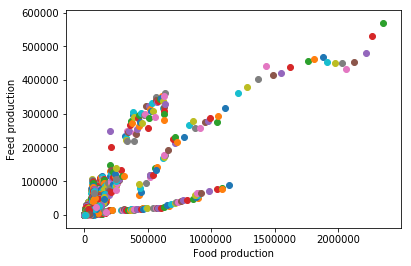

In [8]:
#Summing up food and feed production across all countries for each year
data_fvf_plot = data[['Area Abbreviation','Element','Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010']].groupby(['Area Abbreviation', 'Element']).sum()

#Plotting total food produced by each country vs total feed produced by each country for each year
years = ['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010']
for yr in years:
    for country in data['Area Abbreviation'].unique():
        food = data_fvf_plot.xs((country, 'Food'))[yr]
        feed = data_fvf_plot.xs((country, 'Feed'))[yr]
        plt.scatter(food, feed)
        plt.xlabel('Food production')
        plt.ylabel('Feed production')

In [ ]:
#Plotting food vs feed production across countries, there is roughly a linear relationship between food produced by a country and
#feed produced by the same country across decades. 

# Looking at food and feed production across decades separately

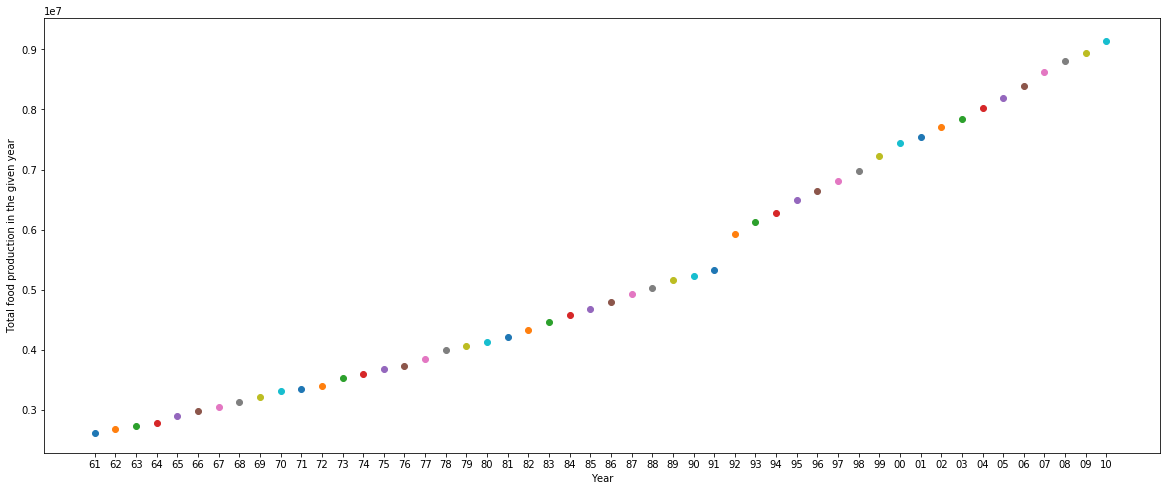

In [9]:
#Plot for food production across 5 decades

data_food = data[data['Element'] == 'Food']
plot_food = data_food[['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010']]


plt.figure(figsize = (20,8))
for yr in years:
    yr_label = yr[-2:]
    plt.scatter(yr_label, plot_food[yr].sum())
    plt.xlabel('Year')
    plt.ylabel('Total food production in the given year')

In [ ]:
#Looking at food production plot across years, food production grows linearly till 1991 and sees a jump at 1992.
#After 1992 food production grows linearly but the rate of increase is larger than previous years. 
#These two pieces of information can be combined together to say that world food production experienced an increase starting 1992.
#Overall, food production has grown 3.5 times from 1960 till 2010.

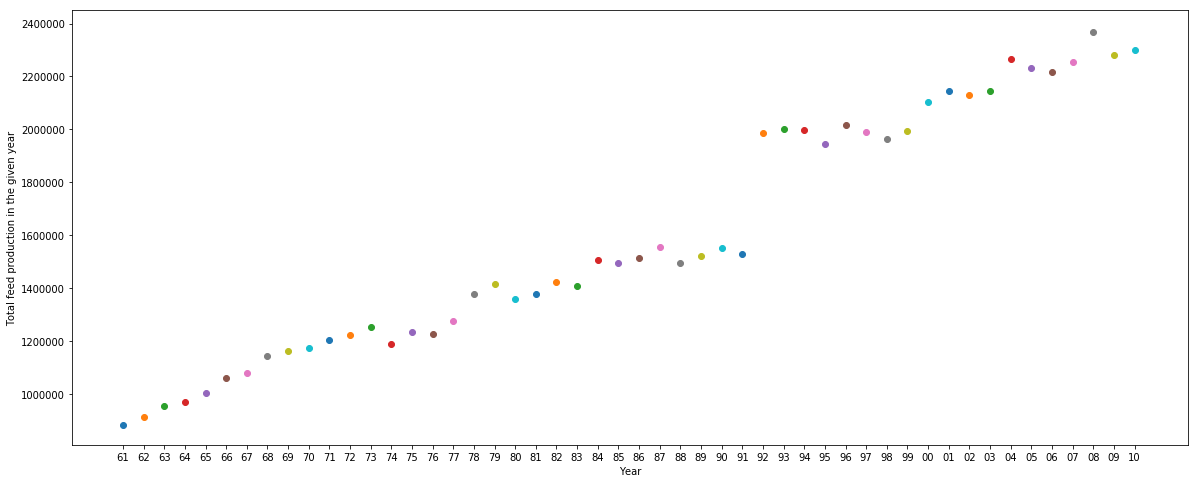

In [10]:
#Plot for feed production across 5 decades

data_feed = data[data['Element'] == 'Feed']
plot_feed = data_feed[['Y1961','Y1962','Y1963','Y1964','Y1965','Y1966','Y1967','Y1968','Y1969','Y1970','Y1971','Y1972','Y1973','Y1974','Y1975','Y1976','Y1977','Y1978','Y1979','Y1980','Y1981','Y1982','Y1983','Y1984','Y1985','Y1986','Y1987','Y1988','Y1989','Y1990','Y1991','Y1992','Y1993','Y1994','Y1995','Y1996','Y1997','Y1998','Y1999','Y2000','Y2001','Y2002','Y2003','Y2004','Y2005','Y2006','Y2007','Y2008','Y2009','Y2010']]

plt.figure(figsize = (20,8))
for yr in years:
    yr_label = yr[-2:]
    plt.scatter(yr_label, plot_feed[yr].sum())
    plt.xlabel('Year')
    plt.ylabel('Total feed production in the given year')

In [ ]:
#Looking at feed production across years, feed production grows linearly from 1961 till 1973 but experiences fluctuations up till
#1991. It experiences a sudden jump in the year 1992 followed by fluctuations but an overall rise in production.

In [ ]:
#Interesting observation: Worldwide food and feed production experienced a jump in the year 1992. 
#This can probably be attributed to some major change in technology.

# Relationship between food production vs population growth over the years

In [11]:
#Taking data from World Bank website regarding world population from 1961-2010, looking into food production vs population relationship
world_population= {'Y1961': 3.073e9,'Y1962': 3.127e9,'Y1963': 3.192e9,'Y1964': 3.257e9,'Y1965': 3.325e9,
                   'Y1966': 3.395e9,'Y1967': 3.465e9,'Y1968': 3.535e9,'Y1969': 3.61e9,'Y1970': 3.686e9,
                   'Y1971': 3.763e9,'Y1972': 3.84e9,'Y1973': 3.916e9,'Y1974': 3.993e9,'Y1975': 4.068e9,
                   'Y1976': 4.141e9,'Y1977': 4.213e9,'Y1978': 4.287e9,'Y1979': 4.363e9,'Y1980': 4.439e9,
                   'Y1981': 4.518e9,'Y1982': 4.599e9,'Y1983': 4.681e9,'Y1984': 4.763e9,'Y1985': 4.846e9,
                   'Y1986': 4.932e9,'Y1987': 5.02e9,'Y1988': 5.109e9,'Y1989': 5.198e9,'Y1990': 5.288e9,
                   'Y1991': 5.375e9,'Y1992': 5.46e9,'Y1993': 5.545e9,'Y1994': 5.629e9,'Y1995': 5.714e9,
                   'Y1996': 5.797e9,'Y1997': 5.879e9,'Y1998': 5.961e9,'Y1999': 6.042e9,'Y2000': 6.122e9,
                   'Y2001': 6.201e9,'Y2002': 6.281e9,'Y2003': 6.36e9,'Y2004': 6.44e9,'Y2005': 6.52e9,
                   'Y2006': 6.601e9,'Y2007': 6.683e9,'Y2008': 6.766e9,'Y2009': 6.85e9,'Y2010': 6.933e9}

#Creating a dataframe containing information about total food for all years from 1960 to 2010
total_population = pd.Series(world_population, index = years)


In [12]:
world_food ={}
for yr in years:
    world_food[yr] = plot_food[yr].sum()

#Creating a dataframe containing information about total food for all years from 1960 to 2010
total_food = pd.Series(world_food, index = years)

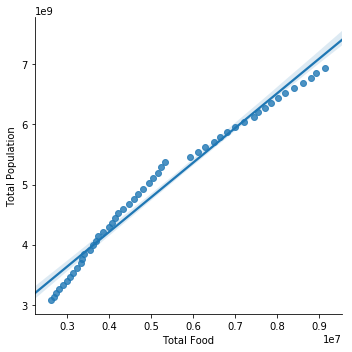

In [13]:
#Combining food production and population data in one dataframe
food_vs_population = pd.concat([total_food, total_population], axis=1)
food_vs_population.reset_index(inplace = True)
food_vs_population.columns = ['Year', 'Total Food', 'Total Population']

#Plotting total food vs total poulation across all years from 1960-2010
sns.lmplot(x = 'Total Food', y = 'Total Population', data = food_vs_population)

In [ ]:
#There is a very strong linear relationship between food production vs population growth across 5 decades. 

# How has total number of unique food and feed products changed across 5 decades?

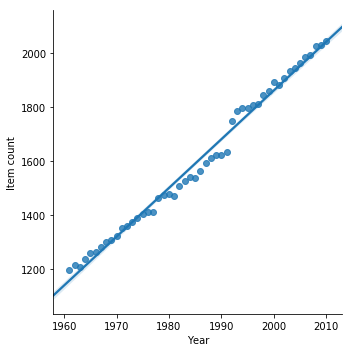

In [14]:
#Creating a series for total number of unique items produced in each year
items = {}
for yr in years:
    items[yr] = data[yr].nunique()
    
#Constructing a dataframe in order to plot results
items_data = pd.Series(items).reset_index()
items_data.columns = ['Year', 'Item count']
items_data['Year'] = items_data['Year'].apply(lambda x:x.split('Y')[1])
items_data['Year'] = items_data['Year'].astype('int64')

#Plotting total number of unique food and feed products across years
sns.lmplot(x = 'Year', y = 'Item count', data = items_data)

In [ ]:
#Total number of unique food and feed products have seen a linear increase from 1960 to 2010. 
#This can be attributed to improvements in technology. 